# Part 1 - Import Libraries & Data

In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [4]:
#import data

citi_02 = pd.read_csv(r'C:/Users/mrtak/10-2023 City Bike Analysis/city_01.csv')

In [5]:
#check head

citi_02.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


In [6]:
#drop Unnamed: 0
citi_02 = citi_02.drop(columns = ['Unnamed: 0'])

In [7]:
#changing gender variables back to numeric - 0=unknown 1=male 2= female
citi_02['gender']=citi_02['gender'].replace(['Uknown','male','female'],[0,1,2])

In [8]:
#redo head
citi_02.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


# Part 2 - Pick Variables

In [9]:
citi_sub = citi_02[['start_hour','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','trip_duration','birth_year']]

In [10]:
citi_sub

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
0,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968.0
1,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983.0
2,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989.0
3,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988.0
4,22,293,40.730287,-73.990765,432,40.726218,-73.983799,427,1986.0
...,...,...,...,...,...,...,...,...,...
42986,15,435,40.741740,-73.994156,448,40.756604,-73.997901,975,1973.0
42987,16,224,40.711464,-74.005524,301,40.722174,-73.983688,1541,1975.0
42988,17,261,40.694749,-73.983625,151,40.721816,-73.997203,1191,1970.0
42989,18,402,40.740343,-73.989551,524,40.755273,-73.983169,1050,1961.0


# Part 3 - Create Correlation Matrix Heatmap

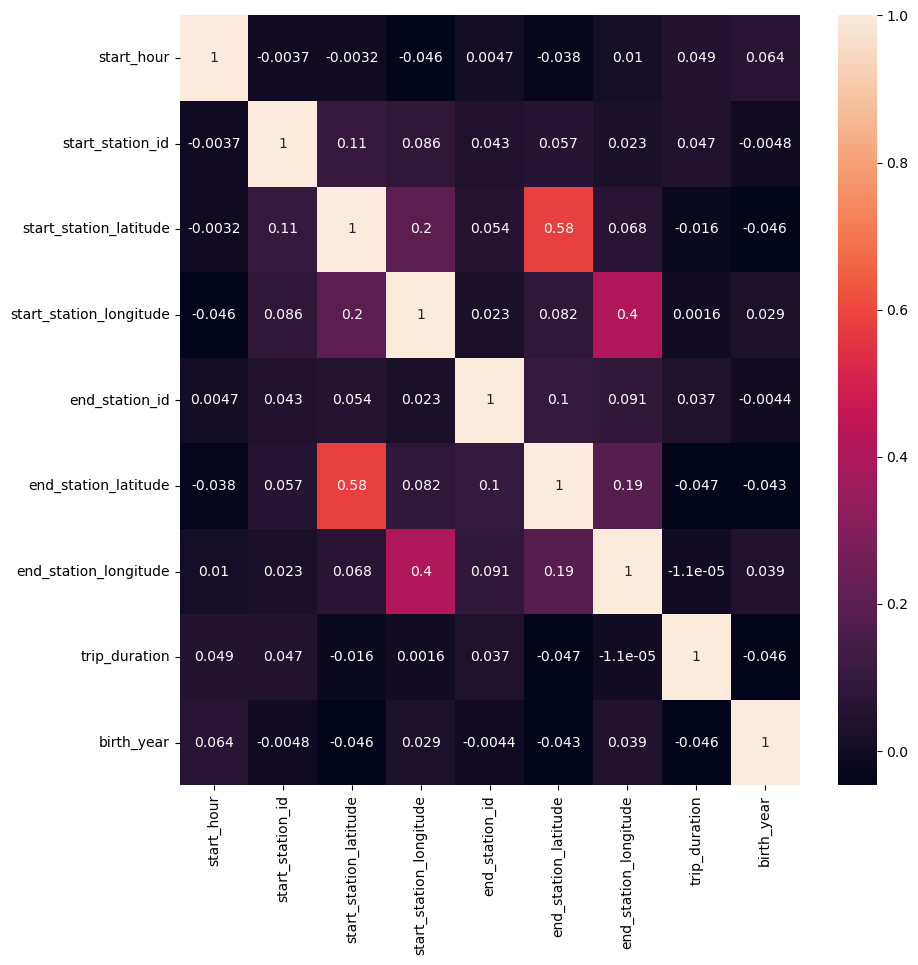

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(citi_sub.corr(), annot = True, ax = ax)

## Notes

THere are variables that have little correlation with each other for most of the data sets. However, the strongest correlations are start station latitude and end station latitude, as well as between start station longtitude with end station longtitude with moderate correlations.

In [12]:
citi_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42991 non-null  object 
 1   start_hour               42991 non-null  int64  
 2   start_station_id         42991 non-null  int64  
 3   start_station_name       42991 non-null  object 
 4   start_station_latitude   42991 non-null  float64
 5   start_station_longitude  42991 non-null  float64
 6   end_station_id           42991 non-null  int64  
 7   end_station_name         42991 non-null  object 
 8   end_station_latitude     42991 non-null  float64
 9   end_station_longitude    42991 non-null  float64
 10  trip_duration            42991 non-null  int64  
 11  subscriber               42991 non-null  object 
 12  birth_year               42991 non-null  float64
 13  gender                   42991 non-null  int64  
 14  start_of_ride         

In [13]:
#changing datatype to - datetime
citi_02['ride_start']=pd.to_datetime(citi_02['start_of_ride'],infer_datetime_format=True)
citi_02['ride_end']=pd.to_datetime(citi_02['end_of_ride'],infer_datetime_format=True)

In [14]:
citi_02.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,ride_start,ride_end
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,2013-09-27 22:01:01,2013-09-27 22:08:08


In [15]:
#dropping start of ride & end of ride  column
citi_02 = citi_02.drop(columns = ['start_of_ride'])
citi_02 = citi_02.drop(columns = ['end_of_ride'])

In [16]:
citi_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42991 non-null  object        
 1   start_hour               42991 non-null  int64         
 2   start_station_id         42991 non-null  int64         
 3   start_station_name       42991 non-null  object        
 4   start_station_latitude   42991 non-null  float64       
 5   start_station_longitude  42991 non-null  float64       
 6   end_station_id           42991 non-null  int64         
 7   end_station_name         42991 non-null  object        
 8   end_station_latitude     42991 non-null  float64       
 9   end_station_longitude    42991 non-null  float64       
 10  trip_duration            42991 non-null  int64         
 11  subscriber               42991 non-null  object        
 12  birth_year               42991 n

## Step 4 - Scatterplots

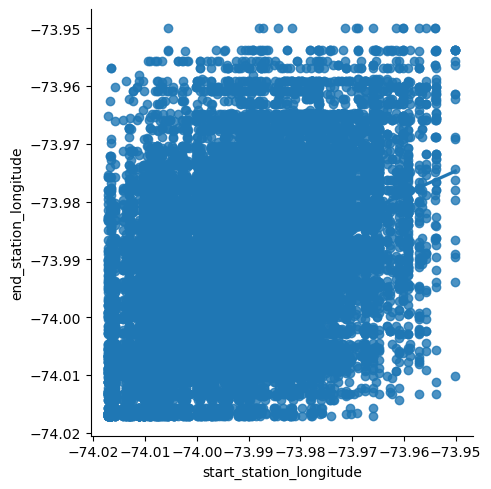

In [17]:
# Create scatterplot for the "start station longtitude" and "end station longtitude" columns 
scatter_1 = sns.lmplot(x = 'start_station_longitude', y = 'end_station_longitude', data = citi_02)

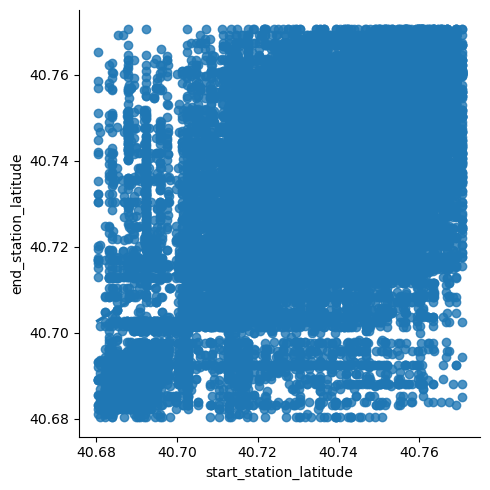

In [18]:
# Create scatterplot for the "start station latitude" and "end station latitude" columns 
scatter_2 = sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = citi_02)

# Notes

Even though there is moderate positive correlation between latitude of start and end stations, as well as longtitude of start and end station, it is mostly factored by having all citi bikes in New York city where start location and end locations are quite close to each other.

## Step 5 - Create pairplot of entire datasets

In [19]:
# Check columns
citi_02.columns

Index(['day_of_week', 'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'ride_start',
       'ride_end'],
      dtype='object')

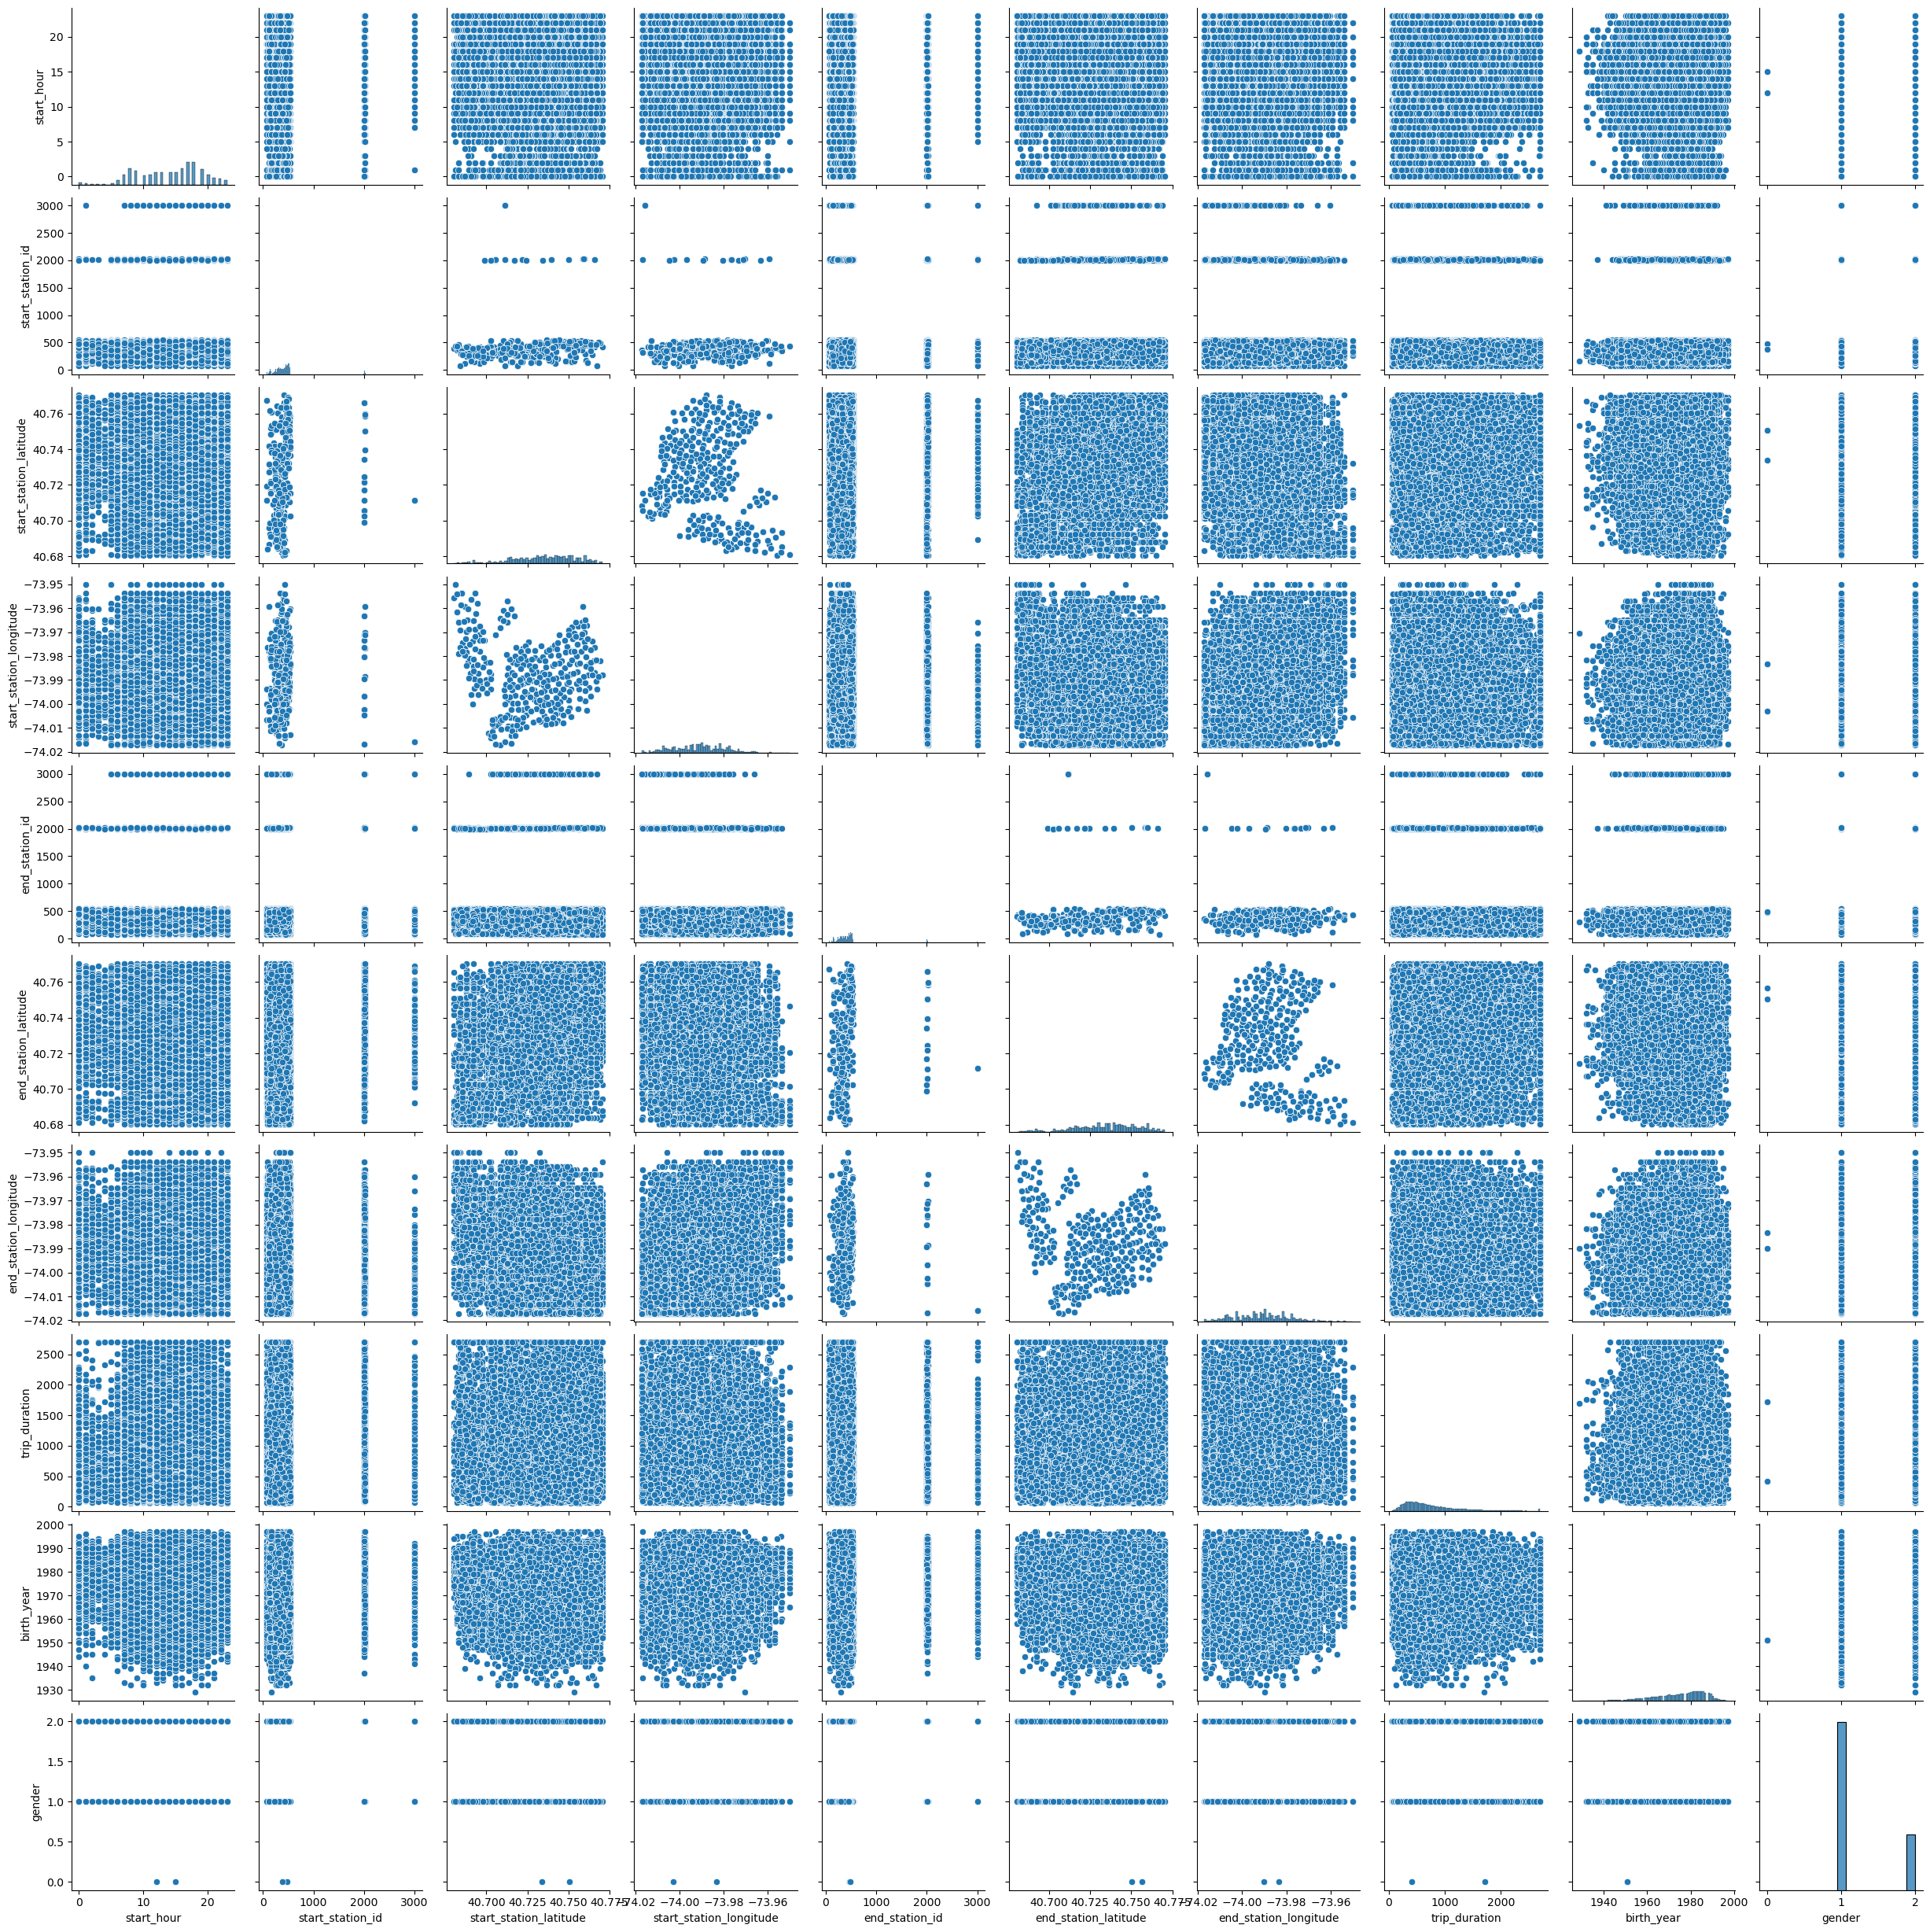

In [20]:
# Create pair plot
pairplot = sns.pairplot(citi_02)

Based on this pair plot, relationships between these variables are still not immediately very strong. There are a few variables I would like to explore further in a categorical plot, namely the day of week and start time, ridership count per day, and calculated subscriber vs nonsubscriber relationships. I am still interested in drilling down into the age group variable further, however the other quantitative variables in this data set do not seem to have any strong relationships, so I'm interested to explore the busiest stations as well.

## Step 6 Categorical Plot

### Day of Week vs Ridership

<Axes: xlabel='day_of_week', ylabel='Count'>

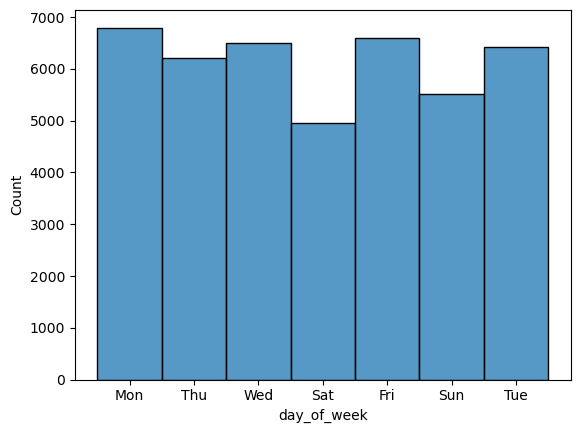

In [21]:
sns.histplot(citi_02['day_of_week'],bins = 20)

In [22]:
#Apply flags
citi_02['day_of_week'].value_counts(dropna = False)

Mon    6797
Fri    6594
Wed    6490
Tue    6429
Thu    6212
Sun    5505
Sat    4964
Name: day_of_week, dtype: int64

### Time of Day Vs Ridership

<Axes: xlabel='start_hour', ylabel='Count'>

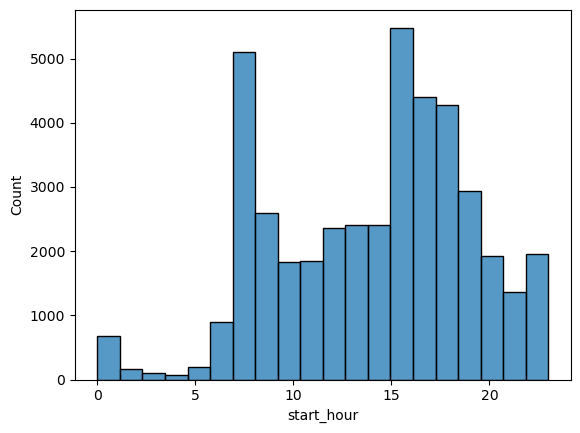

In [23]:
sns.histplot(citi_02['start_hour'],bins = 20)

In [24]:
#Apply flags
citi_02.loc[citi_02['start_hour'] < 6, 'time of day'] = 'early morning'
citi_02.loc[(citi_02['start_hour'] >= 6) & (citi_02['start_hour'] < 11), 'time of day'] = 'morning'
citi_02.loc[(citi_02['start_hour'] >= 11) & (citi_02['start_hour'] < 16), 'time of day'] = 'mid-day'
citi_02.loc[(citi_02['start_hour'] >= 16) & (citi_02['start_hour'] < 21), 'time of day'] = 'evening'
citi_02.loc[citi_02['start_hour'] >= 21, 'time of day'] = 'night'

In [25]:
citi_02['time of day'].value_counts(dropna=False)

evening          16585
mid-day          11439
morning          10420
night             3333
early morning     1214
Name: time of day, dtype: int64

### Subscriber vs Age

<Axes: xlabel='birth_year', ylabel='Count'>

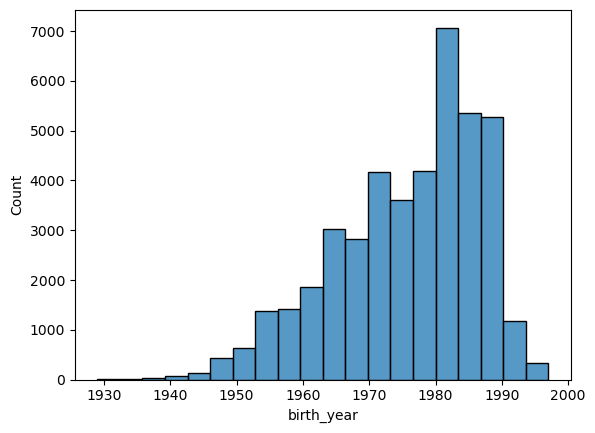

In [26]:
sns.histplot(citi_02['birth_year'],bins = 20)

In [27]:
#Apply flags
citi_02.loc[citi_02['birth_year'] < 1950, 'age group'] = 'Elderly Silents'
citi_02.loc[(citi_02['birth_year'] >= 1950) & (citi_02['birth_year'] < 1965), 'age group'] = 'Baby Boomers'
citi_02.loc[(citi_02['birth_year'] >= 1965) & (citi_02['birth_year'] < 1980), 'age group'] = 'Generation X'
citi_02.loc[(citi_02['birth_year'] >= 1980) & (citi_02['birth_year'] < 1995), 'age group'] = 'Millennials'
citi_02.loc[citi_02['birth_year'] >= 1995, 'age group'] = 'Generation Z'

In [28]:
citi_02['age group'].value_counts(dropna=False)

Millennials        19017
Generation X       16362
Baby Boomers        6738
Elderly Silents      699
Generation Z         175
Name: age group, dtype: int64

## Step 7 - Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

<Axes: xlabel='subscriber', ylabel='Count'>

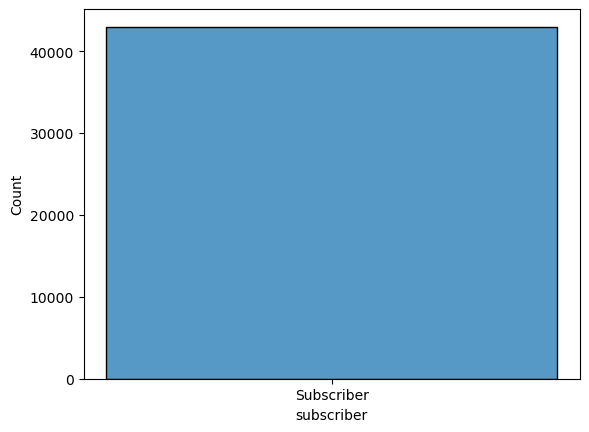

In [29]:
#subscriber vs non subscriber count

sns.histplot(citi_02['subscriber'],bins = 2)

In [30]:
citi_02['subscriber'].value_counts(dropna=False)

Subscriber    42991
Name: subscriber, dtype: int64

<Axes: >

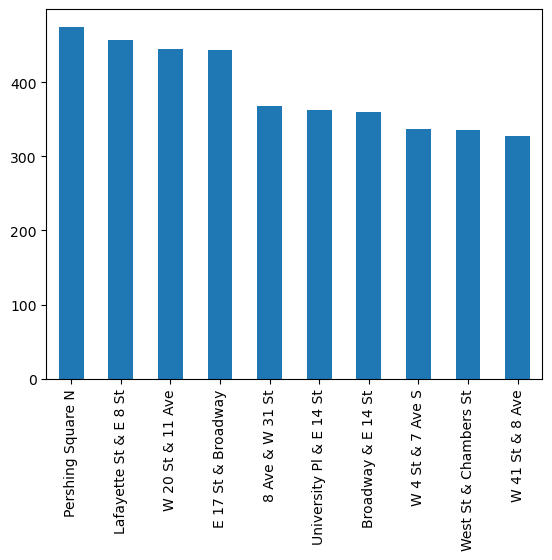

In [31]:
#busiest start station analysis

start_top_10 = (citi_02['start_station_name'].value_counts()).iloc[:10]
start_top_10.plot(kind='bar')

<Axes: >

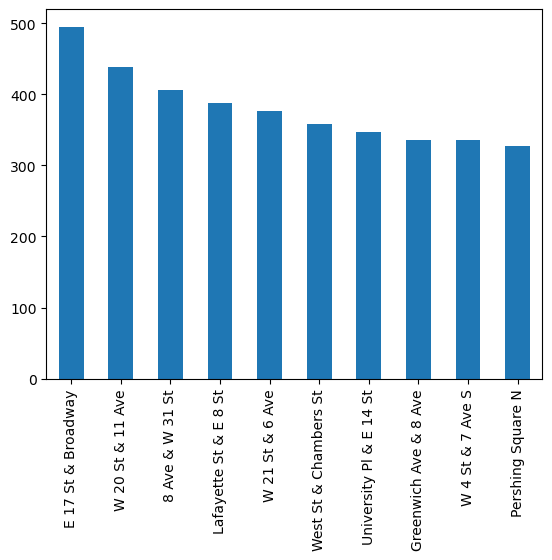

In [32]:
#busiest end station analysis

end_top_10 = (citi_02['end_station_name'].value_counts()).iloc[:10]
end_top_10.plot(kind='bar')

<Axes: >

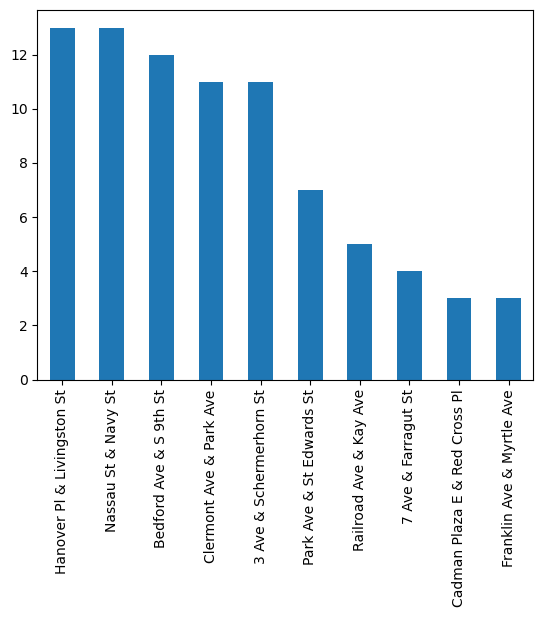

In [33]:
#least busiest start station analysis

start_bottom_10 = (citi_02['start_station_name'].value_counts()).iloc[-10:]
start_bottom_10.plot(kind='bar')

<Axes: >

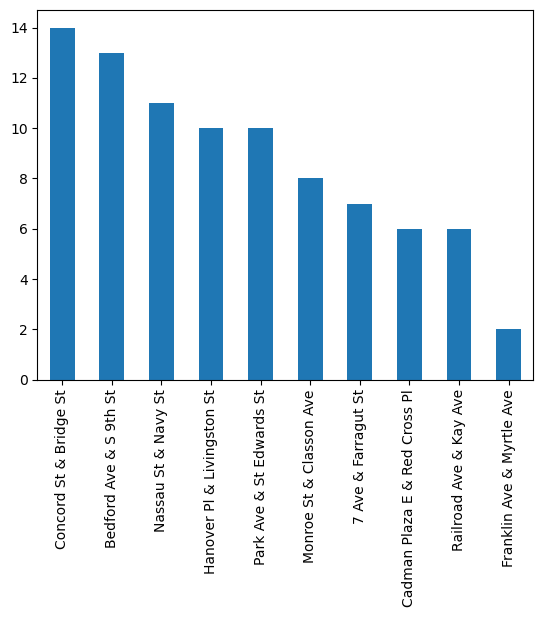

In [34]:
#least busiest end station analysis

end_bottom_10 = (citi_02['end_station_name'].value_counts()).iloc[-10:]
end_bottom_10.plot(kind='bar')

## Early Findings of Hypothesis

1. What are the busiest days for Citi Bike?
    The busiest days are Monday, Wednesay, and Friday
    Least busy days are Saturday and Sunday
2. What time of the day do people use Citi Bike most frequently or least frequently? 
    Most Frequently:Evening and mid day, then morning based on frequency, which occurs in work hours.
3. What are trends between subscribers and nonsubscribers?
    Since nonsubscribers didn't put birth data, we cannot tell trend since we cleaned out birth year     data in Exercise 6.1. We can only understand frequency of days or times for subscribers.
4. How many users are subscribers vs nonsubscribers?
    There are  42,991 subscribers in the data
5. What age groups are busiest or least busiest?
    The busiest age groups are Millenials, while elderly Silent Generations are least busiest 
    customer age group.
6. What stations are busiest or least busiest?
    I was able to find busiest and least buest station based on the bar charts above, such as 
    Broadway/17th,  8th/31st,  21st/6th, Pershing Square, and 17th/Broadway as busiest stations.
    Least busiest stations includes Franklin/Myrtle and 7th/Farragut
    
### New Questions
1. Do busy stations decrease or increase ridership over time?
2. Should we subcategorize frequency by time of day for each day of week, especially weekends vs weekdays?

## Step 8 - Hypothesis

Based on my analysis and findings, here are the four hypothesis to consider for the study?
1. If ridership is higher during work hours, there will be increased ridership on weekdays.
2. If ridership is impacted by work hours, there will be higher bike traffic for busiest stations.
3. If younger generations have higher ridership, there will be increased ridership between 9am-5pm based on typical work hours.
4. If ridership is more prevalent in Manhattan Financial District, there will be more traffic in the region.

In [35]:
citi_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42991 non-null  object        
 1   start_hour               42991 non-null  int64         
 2   start_station_id         42991 non-null  int64         
 3   start_station_name       42991 non-null  object        
 4   start_station_latitude   42991 non-null  float64       
 5   start_station_longitude  42991 non-null  float64       
 6   end_station_id           42991 non-null  int64         
 7   end_station_name         42991 non-null  object        
 8   end_station_latitude     42991 non-null  float64       
 9   end_station_longitude    42991 non-null  float64       
 10  trip_duration            42991 non-null  int64         
 11  subscriber               42991 non-null  object        
 12  birth_year               42991 n

In [ ]:
#save and export dataframe
citi_02.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\city_02.csv')